# Problem Set 3, due February 10 at 11:59am (i.e., noon).

###Before You Start

Make sure the following libraries load correctly (hit Ctrl-Enter). Note that while you are loading several powerful libraries, including machine learning libraries, the goal of this problem set is to implement several algorithms from scratch. In particular, you should *not* be using any built-in libraries for nearest neighbors, distance metrics, or cross-validation -- your mission is to write those algorithms in Python! Parts 1 and 2 will be relatively easy; Part 3 will take more time.

*Also note:* For this assignment we are requiring you to use base **matplotlib** - no more Seaborn or other packages. This will help you become familiar with techniques for maintaining fine-grained control over your data visualizations. It will also help our graders, who spent countless hours trying to make various versions import for grading.

In [2]:
import IPython
import numpy as np
from numpy import *
import scipy as sp
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn

---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing).  Please read about the dataset carefully before continuing.  Use the following commands to load the dataset:


In [3]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [4]:
print bdata.keys()
print bdata.feature_names
print bdata.data.shape
print bdata.target.shape
# uncomment the following if you want to see a lengthy description of the dataset

# print bdata.DESCR



['data', 'feature_names', 'DESCR', 'target']
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506L, 13L)
(506L,)


---

##Part 1: Descriptive analysis

Before beginning the "real" work, dig into the data a bit do see what you're dealing with.  If you're new to analyzing data in Python, please make sure to read the relevant readings linked to on Canvas before beginning (for instance, [this one](https://github.com/jrjohansson/scientific-python-lectures)).

###1.1: Histogram of housing prices

Below you will find some very basic code to make a very basic histogram of median housing prices (the "target" variable) for your dataset.  Your first task is to make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


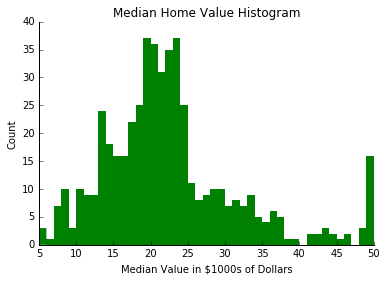

In [5]:
# prepare IPython to work with matplotlib and import the library to something convenient
%matplotlib inline  
import matplotlib.pyplot as plt  

# edit the code below to make the graph look good
plt.hist(bdata.target, bins=np.arange(min(bdata.target), max(bdata.target) + 1, 1), color = 'green', edgecolor = 'none')

# remove top and right borders
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tick_params(
    axis='both',     # changes apply to the x-axis
    which='both',    # both major and minor ticks are affected
    bottom='on',    # ticks along the bottom edge are on
    top='off',  # ticks along the top edge are off
    right = 'off',  # ticks along the right edge are off
    labelbottom='on')  # labels along the bottom edge are off

# add labels
plt.gca().set_xlabel('Median Value in $1000s of Dollars')
plt.gca().set_ylabel('Count')
plt.gca().set_title('Median Home Value Histogram')

###1.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Properly label your axes, and make sure that your graphic looks polished and professional.


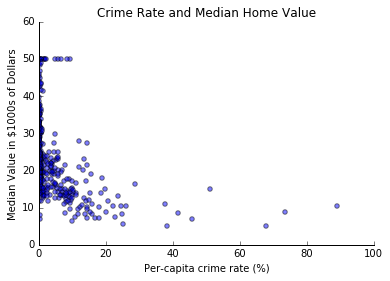

In [6]:
# build bdata into pandas dataframe
bdf = pd.DataFrame(bdata.data, columns = bdata.feature_names)
# add medv (target) data
bdf['target'] = bdata.target 
# make lowercase
bdf.columns = [x.lower() for x in bdf.columns] 

# create scatterplot on crim and target
plt.scatter(bdf.crim, bdf.target, alpha = .5)

# remove top and right borders
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tick_params(
    axis='both',     # changes apply to the x-axis
    which='both',    # both major and minor ticks are affected
    bottom='on',    # ticks along the bottom edge are on
    top='off',  # ticks along the top edge are off
    right = 'off',  # ticks along the right edge are off
    labelbottom='on')  # labels along the bottom edge are off
# set x-axis limits
plt.gca().set_xlim([0,100])
# add labels
plt.gca().set_xlabel('Per-capita crime rate (%)')
plt.gca().set_ylabel('Median Value in $1000s of Dollars')
plt.gca().set_title('Crime Rate and Median Home Value')

###1.3 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.

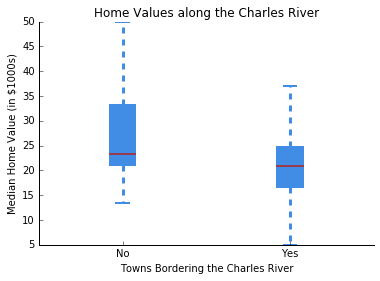

In [7]:
# get crime data, split by on charles and off
crime_chas = bdf['target'][bdf.chas == 1]
crime_nochas = bdf['target'][bdf.chas == 0]

# join into single dataframe
chas_data =  pd.concat([crime_chas,crime_nochas], ignore_index=True, axis=1)
# name columns
chas_data.columns = ['No', 'Yes']
# create boxplot w/ filled boxes
chas_plot = chas_data.boxplot(patch_artist = True, showfliers = False,return_type='dict')

# remove top and right borders
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.tick_params(
    axis='both',     # changes apply to the x-axis
    which='both',    # both major and minor ticks are affected
    bottom='on',    # ticks along the bottom edge are on
    top='off',  # ticks along the top edge are off
    right = 'off',  # ticks along the right edge are off
    labelbottom='on')  # labels along the bottom edge are off
# add labels
plt.gca().set_xlabel('Towns Bordering the Charles River')
plt.gca().set_ylabel('Median Home Value (in $1000s)')
plt.gca().set_title('Home Values along the Charles River')

# remove grid
plt.gca().xaxis.grid(False)
plt.gca().yaxis.grid(False)

## change outline color, fill color and linewidth of the boxes
for box in chas_plot['boxes']:
    # change outline color
    box.set( color='#418DE5', linewidth=2)
    # change fill color
    box.set( facecolor = '#418DE5' )

## change color and linewidth of the whiskers
for whisker in chas_plot['whiskers']:
    whisker.set(color='#418DE5', linewidth=3)

## change color and linewidth of the caps
for cap in chas_plot['caps']:
    cap.set(color='#418DE5', linewidth=2)

## change color and linewidth of the medians
for median in chas_plot['medians']:
    median.set(color='#983B4E', linewidth=2)

## change the style of fliers and their fill
for flier in chas_plot['fliers']:
    flier.set(marker='_', color='#983B4E', alpha=0.5)

---

##Part 2: Experimental Setup

The goal of the next few sections is to design an experiment to predict the median home value for an instance in the data.

###2.1 Begin by writing a function to compute the Root Mean Squared Error for a list of numbers

You can find the sqrt function in the Numpy package. Furthermore the details of RMSE can be found on [Wikipedia](http://en.wikipedia.org/wiki/Root-mean-square_deviation)



In [8]:
from numpy import sqrt

"""
Function
--------
compute_rmse

Given two arrays, one of actual values and one of predicted values,
compute the Roote Mean Squared Error

Parameters
----------
predictions : array
    Array of numerical values corresponding to predictions for each of the N observations

yvalues : array
    Array of numerical values corresponding to the actual values for each of the N observations

Returns
-------
rmse : int
    Root Mean Squared Error of the prediction

Example
-------
>>> print compute_rmse((2,2,3),(0,2,6)
2.08
"""
# compute_rmse function, taking 2 tuples: predictions, yvalues
def compute_rmse(predictions, yvalues):
    x = 0.0 # innitialize to float
    for i, p in enumerate(predictions):
        x += (p - yvalues[i])**2
    x = sqrt(x/len(predictions))
    return round(x, 2)

# test function
print compute_rmse((2,2,3),(0,2,6))



2.08


###2.2 Divide your data into training and testing datasets

Randomly select 66% of the data and put this in a training dataset (call this "bdata_train"), and place the remaining 34% in a testing dataset (call this "bdata_test")


In [9]:
# leave the following line untouched, it will help ensure that your "random" split is the same "random" split used by the rest of the class
np.random.seed(seed=13579)

# split into training set based on random index
train_ix = np.random.choice(bdf.index, round(.66*len(bdf)), replace=False)
bdata_train = bdf.ix[train_ix]
# put the non-training records into test set
bdata_test = bdf[~bdf.isin(bdata_train)].dropna()



C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


###2.3 Use a very bad baseline for prediction, and compute RMSE

Create a model that predicts, for every observation x_i, that the median home value is the average (mean) of the median values for all instances in the training set.  Compute the RMSE on the training set.  Now compute the RMSE on the test data set (but use the model you trained on the training set!).  How does RMSE compare for training vs. testing datasets? Is this what you expected, and why?

In [10]:
# calculate training target mean, assign to yhat column
bad_bl = bdata_train.target.mean()
bdata_train['bad_yhat'] = bad_bl

# calculate rmse
print compute_rmse(bdata_train.bad_yhat.values, bdata_train.target.values)

# calculate test target mean, assign to yhat column
bdata_test['bad_yhat'] = bad_bl

# calculate rmse
print compute_rmse(bdata_test.bad_yhat.values, bdata_test.target.values)

8.57
10.31


The RMSE is lower for the training data, indicating it is better fit to the training data than the test. This is generally what I expected, since the prediction was based on a very rough measure of the training data. There would be little reason to believe it would fit the test data well, other than through random chance. (Though to be honest, RMSE of 10.31 is actually better than I would have guessed)

---

##Part 3: Nearest Neighbors


###3.1 Nearest Neighbors: Distance function
Let's try and build a machine learning algorithm to beat the "Average Value" baseline that you computed above.  Soon you will implement the Nearest Neighbor algorithm, but first you need to create a distance metric to measure the distance (and similarity) between two instances.  Write a generic function to compute the L-Norm distance (called the [*p*-norm](http://en.wikipedia.org/wiki/Norm_(mathematics) distance on Wikipedia). Verify that your function works by computing the Euclidean distance between the points (3,4) and (6,8).

In [11]:
"""
Function
--------
distance

Given two instances and a value for L, return the L-Norm distance between them

Parameters
----------
x1, x2 : array
    Array of numerical values corresponding to predictions for each of the N observations

L: int
    Value of L to use in computing distances

Returns
-------
dist : int
    The L-norm distance between instances

Example
-------
>>> print distance((3,4),(6,8),2)
7

"""
def distance(x1, x2, L):
    dist = sum(abs(v2 - v1)**L for v1, v2 in zip(x1, x2))  # sum difference in inputs and raise to Lth power
    return dist**(1.0/L)  # take Lth root

print distance((3,4),(6,8),2)

5.0


###3.2 Basic Nearest Neighbor algorithm

Now things get fun.  Your task is to implement a basic nearest neighbor algorithm from scratch.  Your simple model will use two input features (CRIM and RM) and a single output (MEDV).  In other words, you are modelling the relationship between median home value and crime rates and house size.

Use your training data (bdata_train) to "fit" your model, although as you know, with Nearest Neighbors there is no real training, you just need to keep your training data in memory.  Write a function that predicts, for each instance in the testing data (bdata_test), the median home value using the nearest neighbor algorithm we discussed in class.  Since this is a small dataset, you can simply compare your test instance to every instance in the training set, and return the MEDV value of the closest training instance.  Have your function take L as an input, where L is passed to the distance function.

Compute the RMSE for the Nearest Neighbor predictions on the test set, using the Euclidean distance.  Report an estimate of the total time taken by your code to predict the nearest neighbors for all the values in the test data set.

In [12]:
"""
Function
--------
nneighbor

Given two datasets, the features of interest, a value for L, and the name of the target column, 
return the RMSE for predicted target vs. actual

Parameters
----------
dftest, dftrain: dataframe
    Dataframes of each of the N observations, split into training and test

L: int
    Value of L to use in computing distances

rmse : int
    Root Mean Squared Error of the prediction

Example
-------
>>> print nneighbor(bdata_test, bdata_train, ('crim', 'rm'), 2)
RMSE: 7.4

"""
import time


def nneighbor(dftest, dftrain, features, L, target):
    start_time = time.time() # start clock
    # create copies of dftest and dftrain
    test_df_full = dftest.copy(deep=True)
    test_df_full.loc[:,'yhat'] = 0.0 # initialize yhat to float
    train_df_full = dftrain.copy(deep=True)
    
    # create sub-dfs with only the features specified
    test_df = dftest.select(lambda x: x in features, axis=1)
    train_df = dftrain.select(lambda x: x in features, axis=1)
    
    # apply distance function to every row in training dataset for every row in test dataset, collect in ndarray
    t = np.array(map(lambda v: map(lambda w: distance(v, w, L), train_df.values), test_df.values)) 
    
    min_index = argmin(t, axis = 1) # return the index of the lowest distance
    
    for i, j in enumerate(min_index):
        test_df_full.iloc[i]['yhat'] = train_df_full.iloc[j][target] # assign the value of the corresponding index to yhat

    # compute the RMSE for the predicted values against the known
    rmse = compute_rmse((test_df_full.yhat.values), (test_df_full.target.values))  

    print "Time taken: " + str(round(time.time() - start_time,2)) + " seconds"
    return rmse

print "RMSE: " + str(nneighbor(bdata_test, bdata_train, ('crim', 'rm'), 2, 'target'))


                   

Time taken: 0.22 seconds
RMSE: 7.4


###3.3 Results and Normalization

If you were being astute, you would have noticed that we never normalized our features -- a big no-no with Nearest Neighbor algorithms.  Write a generic normalization function that takes as input an array of values for a given feature, and returns the normalized array (subtract the mean and divide by the standard deviation).

Re-run the Nearest Neighbor algorithm on the normalized dataset (still just using CRIM and RM as input), and compare the RMSE from this method with your previous RMSE evaluations.

*NOTE*: To normalize properly, best practice is to compute the mean and standard deviation on the training set, and use these values to normalize the testing dataset. However, for this problem set, it is okay if you separately normalize each dataset using the respective mean and standard deviation.

In [21]:
"""
Function
--------
normalize

Given an array of numeric values, return an array of normalized values, using the formula: (mean/standard deviation)

Parameters
----------
raw_data: array
    Dataframes of each of the N observations, split into training and test

Example
-------
>>> x = [0,1,4,4,10]
>>> print normalize(x)
[-1.0897247358851685,
 -0.80295506854696619,
 0.057353933467640499,
 0.057353933467640499,
 1.7779719374968539]
"""
def normalize(raw_data):
    data_mean = mean(raw_data)
    data_std = std(raw_data)
    normalized_data = [(r- data_mean) / data_std for r in raw_data]
    return normalized_data


# Incorporating the normalize function into the nneighbor function
def nneighbor(dftest, dftrain, features, L, target):
    start_time = time.time() # start clock
    # create copies of dftest and dftrain
    test_df_full = dftest.copy(deep=True)
    test_df_full.loc[:,'yhat'] = 0.0 # initialize yhat to float
    train_df_full = dftrain.copy(deep=True)
    
    # add normalization to the test and training sets
    test_df = dftest.select(lambda x: x in features, axis=1).apply(normalize, axis=0)
    train_df = dftrain.select(lambda x: x in features, axis=1).apply(normalize, axis=0)
    
    # apply distance function to every row in training dataset for every row in test dataset, collect in ndarray
    t = np.array(map(lambda v: map(lambda w: distance(v, w, L), train_df.values), test_df.values)) 
    
    min_index = argmin(t, axis = 1) # return the index of the lowest distance
    
    for i, j in enumerate(min_index):
        test_df_full.iloc[i]['yhat'] = train_df_full.iloc[j][target] # assign the value of the corresponding index to yhat

    # compute the RMSE for the predicted values against the known
    rmse = compute_rmse((test_df_full.yhat.values), (test_df_full.target.values))  

    print "Time taken: " + str(round(time.time() - start_time,2)) + " seconds"
    return rmse

print "RMSE: " + str(nneighbor(bdata_test, bdata_train, ('crim', 'rm'), 2, 'target'))

print 6.63/std(bdata_train.target)

Time taken: 0.23 seconds
RMSE: 7.69
0.77322884272


Normalizing the data and re-running the nearest neighbor function produced a slightly higher RMSE (7.69 vs. 7.4). This is somewhat surprising, as I would have expected normalized data to produce better predictions than non. Perhaps this is due to the fact that we normalized the test set against itself, as opposed to using the mean, std of the training set.

###3.4 Optimization

A lot of the decisions we've made so far have been arbitrary.  Try to increase the performance of your nearest neighbor algorithm by adding features that you think might be relevant, and by using different values of L in the distance function.  Try a model that uses a different set of 2 features, then try at least one model that uses more than 4 features, then try using a different value of L.  If you're having fun, try a few different combinations of features and L!

What combination of features and distance function provide the lowest RMSE?  Do your decisions affect the running time of the algorithm?

In [13]:
# try various combinations to see effect on RMSE, time
print nneighbor(bdata_test, bdata_train, ('chas', 'indus'), 2, 'target') # 2 features, L = 2
print nneighbor(bdata_test, bdata_train, ('chas', 'indus', 'crim', 'rm'), 2, 'target') # 4 features, L = 2
print nneighbor(bdata_test, bdata_train, ('crim', 'rm', 'nox', 'dis', 'lstat', 'b'), 2, 'target') # 6 features, L = 2
print nneighbor(bdata_test, bdata_train, ('crim', 'rm', 'nox', 'dis', 'lstat', 'b'), 5, 'target') # 6 features, L = 5
print nneighbor(bdata_test, bdata_train, ('crim', 'rm', 'nox', 'dis', 'lstat', 'b'), 10, 'target')# 6 features, L = 10
print nneighbor(bdata_test, bdata_train, ('crim', 'rm', 'nox', 'dis', 'lstat', 'b'), 50, 'target') # 6 features, L = 50
print nneighbor(bdata_test, bdata_train, ('crim', 'rm', 'nox', 'dis', 'lstat', 'b'), 100, 'target') # 6 features, L = 100



Time taken: 0.45 seconds
12.12
Time taken: 0.55 seconds
7.45
Time taken: 0.65 seconds
5.69
Time taken: 0.62 seconds
5.52
Time taken: 0.66 seconds
5.47
Time taken: 0.66 seconds
5.5
Time taken: 0.64 seconds
5.49


Of the combinations I tried, the best performer included 6 features, and an L of 10. As expected, an increase in the number of features corresponds with an increased running time. A higher L value also appears to increase running time, albeit only slightly. L appeared to improve the accuracy as it increased to 10, but then slightly decreased for higher values. 

### 3.5 Cross-Validation

The more you tinkered with your features and distance function, the higher the risk that you overfit your training data.  To prevent this sort of overfitting, you need to use cross-validation (see K-fold [cross-validation](http://en.wikipedia.org/wiki/Cross-validation_(statistics)).  Here you must implement a simple k-fold cross-validation algorithm yourself.  The function you write here will be used several more times in this problem set, so do your best to write efficient code! (Note that the sklearn package has a built-in [K-fold](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) iterator -- you should *not* be invoking that or any related algorithms in this section of the problem set.)

Use 10-fold cross-validation and report the average RMSE for Nearest Neighbors using Euclidean distance with CRIM and RM input features, as well as the total running time for the full run of 10 folds.  In other words, randomly divide your dataset into 10 equally-sized samples, and for each of 10 iterations (the "folds"), use 9 samples as "training data" (even though there is no training in k-NN!), and the remaining 1 sample for testing.  Compute the RMSE of that particular test set, then move on to the next iteration.  Report the average RMSE across the 10 iterations.

In [14]:
"""
Function
--------
xval

Given a pandas dataframe, the features of interest, a value for L, the number of folds, and the name of the target
column, return the mean RMSE for a cross-validated nearest neighbor prediction on the set.

Parameters
----------
dataset: dataframe
    Dataframe of interest

features: array
    Names of the columns to include

L: int
    Value of L to use in computing distances

folds: int
    Numer of folds to use in cross-validation

target: string
    Name of the target column that is being predicted

Example
-------
>>> print xval(bdf, ('crim', 'rm'), 2, 10, 'target')
RMSE: 6.63
"""

def xval(dataset, features, L, folds, target):
    start_time = time.time() # start clock
    np.random.seed(seed=13579) 
    xval_ix = np.random.choice(dataset.index, round(len(dataset)), replace=False) #create random indices
    xval_arrays = np.array(np.array_split(xval_ix, folds))  # split the array of indices into folds
    
    # initiate list to hold rmse's

    xval_rmse_list = []
    
    for n in range(len(xval_arrays)):
        xval_test = dataset.iloc[xval_arrays[n]] # create test set
        
        xval_train = dataset[~dataset.isin(xval_test)].dropna() # create training set out of remaining indices
        xval_test.reset_index(inplace = True, drop = True) # reset index
        xval_train.reset_index(inplace = True, drop = True) # reset index    
        xval_rmse = nneighbor(xval_test, xval_train, features, L, 'target') # call nneighbor, passing  new test and training sets
        xval_rmse_list.append(xval_rmse) # record the rmse
        
    print "Total Time taken: " + str(round(time.time() - start_time,2)) + " seconds"
    return sum(xval_rmse_list)/float(len(xval_rmse_list)) # return mean rmse

print "RMSE: " + str(xval(bdf, ('crim', 'rm'), 2, 10, 'target'))

Time taken: 0.09 seconds
Time taken: 0.09 seconds
Time taken: 0.09 seconds
Time taken: 0.1 seconds
Time taken: 0.09 seconds
Time taken: 0.09 seconds
Time taken: 0.09 seconds
Time taken: 0.09 seconds
Time taken: 0.09 seconds
Time taken: 0.09 seconds
Total Time taken: 0.97 seconds
RMSE: 6.63


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:35: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


###3.6 K-Nearest Neighbors Algorithm

Implement the K-Nearest Neighbors algorithm.  Using 10-fold cross validation, report the RMSE for K=3 and the running time of the algorithm.

In [15]:
"""
# write your function specification here!
"""
# before starting, have to change nneighbor to K-Nearest Neighbors
def knn(dftest, dftrain, features, L, K):
    start_time = time.time() # start clock
    
    # create copies of dftest and dftrain
    test_df_full = dftest.copy(deep=True)
    test_df_full.loc[:,'yhat'] = 0.0 # initialize yhat to float
    train_df_full = dftrain.copy(deep=True)
    
    # create and normalization to the test and training sets
    test_df = dftest.select(lambda x: x in features, axis=1).apply(normalize, axis = 0)
    train_df = dftrain.select(lambda x: x in features, axis=1).apply(normalize, axis = 0)
    
    # apply distance function to every row in training dataset for every row in test dataset, collect in ndarray
    t = np.array(map(lambda v: map(lambda w: distance(v, w, L), train_df.values), test_df.values)) 
    
    minidx = [np.argsort(targets)[:K] for targets in t] # append a K-sized list of the indices corresponding to K-lowest values
     
    # create function to retrieve value given index
    def get_targets(indices):
        return train_df_full.target[indices].values
    
    # apply get_targets to minidx, store values in list of lists
    targets = np.apply_along_axis(get_targets, 0, minidx)
    
    # apply mean to each sublist
    target_mean = np.apply_along_axis(mean, 1, targets)
    
    test_df_full['yhat'] = target_mean # assign the mean values to yhat

    # compute the RMSE for the predicted values against the known
    rmse = compute_rmse((test_df_full.yhat.values), (test_df_full.target.values))  

    print "Time taken: " + str(round(time.time() - start_time,2)) + " seconds"
    return rmse


# rewrite xval to handle knn (instead of just nneighbor)
def knn_xval(dataset, features, L, folds, K):
    start_time = time.time() # start clock
    np.random.seed(seed=13579)
    xval_ix = np.random.choice(dataset.index, round(len(dataset)), replace=False)  # create random indices
    xval_arrays = np.array(np.array_split(xval_ix, folds))    # split the array of indices into folds

    xval_rmse_list = []

    for n in range(len(xval_arrays)):
        xval_test = dataset.iloc[xval_arrays[n]]  # create test set
        xval_train = dataset[~dataset.isin(xval_test)].dropna()  # create training set out of remaining indices
        
        xval_test.reset_index(inplace = True, drop = True)  # reset index so knn function can assign yhat values in order
        xval_train.reset_index(inplace = True, drop = True)  # reset index
        
        #return xval_test
        xval_rmse = knn(xval_test, xval_train, features, L, K)  # call knn, passing  new test and training sets
        xval_rmse_list.append(xval_rmse)  # record the rmse
    print "Total Time taken: " + str(round(time.time() - start_time,2)) + " seconds"
    return sum(xval_rmse_list)/float(len(xval_rmse_list))  # return mean rmse

print knn_xval(bdf, ('crim', 'zn', 'rm', 'age', 'dis', 'tax'), 2, 10, 5)


Time taken: 0.28 seconds
Time taken: 0.22 seconds
Time taken: 0.25 seconds
Time taken: 0.25 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.23 seconds
Time taken: 0.23 seconds
Time taken: 0.22 seconds
Time taken: 0.24 seconds
Total Time taken: 2.43 seconds
5.075


###3.7 Using cross validation to find K

What is the best choice of K?  Compute the RMSE for values of K between 1 and 25 using 10-fold cross-validation.  Use the following features in your model, and don't forget to normalize: CRIM, ZN, RM, AGE, DIS, TAX.  Create a graph that shows how RMSE changes as K increases from 1 to 25.  Label your axes, and summarize what you see.  What do you think is a reasonable choice of K for this model?

In [16]:
# create dictionary to hold the K and RMSE values
k_dict = {}

# run 25 K values through knn_xval
for x in range(1,26):
     k_dict[x] = knn_xval(bdf, ('crim', 'zn', 'rm', 'age', 'dis', 'tax'), 2, 10, x)
     print 'RMSE ' + str(x) + ': ' + str(k_dict[x])


Time taken: 0.23 seconds
Time taken: 0.22 seconds
Time taken: 0.24 seconds
Time taken: 0.25 seconds
Time taken: 0.24 seconds
Time taken: 0.24 seconds
Time taken: 0.24 seconds
Time taken: 0.24 seconds
Time taken: 0.21 seconds
Time taken: 0.22 seconds
Total Time taken: 2.39 seconds
RMSE 1: 6.551
Time taken: 0.22 seconds
Time taken: 0.24 seconds
Time taken: 0.22 seconds
Time taken: 0.23 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.24 seconds
Time taken: 0.24 seconds
Time taken: 0.25 seconds
Time taken: 0.22 seconds
Total Time taken: 2.35 seconds
RMSE 2: 5.488
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.23 seconds
Time taken: 0.24 seconds
Time taken: 0.24 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.25 seconds
Total Time taken: 2.32 seconds
RMSE 3: 5.336
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.22 seconds
Time taken: 0.2

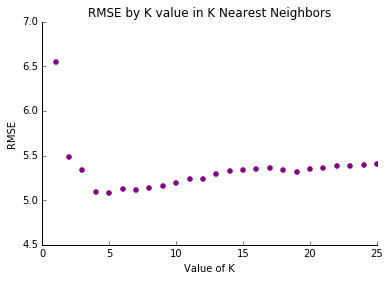

In [17]:
# create scatter plot of K values and RMSEs
plt.scatter(k_dict.keys(), k_dict.values(), color = 'purple')

# remove right and top borders
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.tick_params(
    axis='both',     # changes apply to the x-axis
    which='both',    # both major and minor ticks are affected
    bottom='on',    # ticks along the bottom edge are on
    top='off',  # ticks along the top edge are off
    right = 'off',  # ticks along the right edge are off
    labelbottom='on')  # labels along the bottom edge are off
# set x axis limits
plt.gca().set_xlim([0,25])
# apply labels
plt.gca().set_xlabel('Value of K')
plt.gca().set_ylabel('RMSE')
plt.gca().set_title('RMSE by K value in K Nearest Neighbors')

The chart shows that a K value of 5 produces the smallest RMSE (5.075) for the selected features. Smaller K values likely overfit the training data, resulting in higher test error. As the K increases from 5 to 25, the RMSE also increases in a near-linear fashion, as "oversmoothing" removes some of the predictor's accuracy.